In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import glob
import ataxx_rules
import engine
import model
import train

## Working on MCTS

In [2]:
engine.initialize_model("models/model-001.npy")
engine.setup_evaluator()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [3]:
board = ataxx_rules.AtaxxState.initial()
mcts = engine.MCTS(board)

In [18]:
mcts.step()

<engine.MCTSEdge instance at 0x7fd7cc268d40>

In [19]:
mcts.root_node.outgoing_edges.values()[0].get_edge_score()

0.53505620080977678

In [20]:
len(mcts.root_node.outgoing_edges)

6

## Working on the lack of value convergence.

In [2]:
entries = train.load_entries(glob.glob("games/random-play/*.json"))

In [11]:
s = [train.get_sample_from_entries(entries)[2][0] for _ in xrange(10000)]

In [14]:
s.count(-1)

4904

In [12]:
np.var(s)

0.9996313600000003

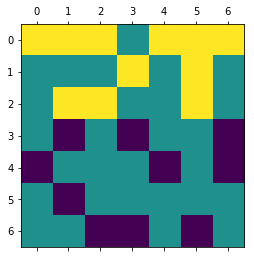

In [141]:
sample = train.get_sample_from_entries2(entries)

plt.matshow(sample[0][0][:,:,1] - sample[0][0][:,:,2])

In [142]:
sample[1:]

(315,
 83,
 2,
 <ataxx_rules.AtaxxState instance at 0x7ff30f4ec710>,
 [[1, 3], [1, 1]])

O O O X X X X
. O O X X X X
. O O # O O O
O . # X # O O
O O O # O O O
X X O O O O .
X X . O O O O


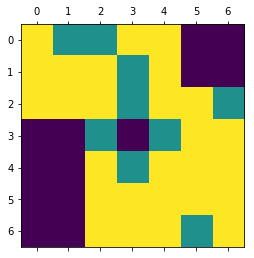

In [152]:
ent_ind = 190
ply_ind = 123
entry = entries[ent_ind]
to_move = 1 if ply_ind % 2 == 0 else 2
board = ataxx_rules.AtaxxState(entry["boards"][ply_ind], to_move=to_move)
arr = engine.board_to_features(board)
plt.matshow(arr[:,:,1] - arr[:,:,2])
print board

In [92]:
print sample[4]

O O O X X X X
. O O X X X X
. O O # O O O
O . # X # O O
O O O # O O O
X X O O O O .
X X . O O O O


## Padding.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.